In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import dask.dataframe as dd

In [4]:
IMG_DIR = '../../analysis'
DPI=120

## Loading data using Dask (loads lazily)

In [5]:
# http://dask.pydata.org/en/latest/dataframe-overview.html
%time lazy_df = dd.read_csv('../../data/raw/2001.csv', encoding='iso-8859-1')

CPU times: user 203 ms, sys: 156 ms, total: 359 ms
Wall time: 473 ms


In [6]:
%time len(lazy_df)

CPU times: user 27.4 s, sys: 6.02 s, total: 33.4 s
Wall time: 27.9 s


5967780

In [31]:
# http://dask.pydata.org/en/latest/dataframe-api.html#dask.dataframe.DataFrame.sample
s = 10000  # desired sample size
n = 5967780
fraction = s / n
df = lazy_df.sample(fraction)

In [8]:
%time len(df)

CPU times: user 28 s, sys: 5.23 s, total: 33.2 s
Wall time: 27.9 s


9999

In [9]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
628400,2001,2,1,4,1420.0,1420,1518.0,1520,WN,1419,...,3,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN
181749,2001,1,19,5,1757.0,1750,1924.0,1918,TW,486,...,14,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
283565,2001,1,26,5,1125.0,1115,1232.0,1222,DL,1137,...,7,20,0,NaN,0,NaN,NaN,NaN,NaN,NaN
258232,2001,1,21,7,1945.0,1945,2231.0,2309,US,159,...,3,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
459588,2001,1,26,5,611.0,615,844.0,855,AA,2753,...,3,13,0,NaN,0,NaN,NaN,NaN,NaN,NaN


## Create numeral versions of categoricals for later analysis

In [10]:
# first turn our 10000 samples into a normal pandas df for convenience
%time df = df.compute()

CPU times: user 29.4 s, sys: 4.92 s, total: 34.3 s
Wall time: 35.2 s


In [11]:
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# turn those text labels into numerical
text_cols = ['UniqueCarrier', 'Origin', 'Dest']
le = preprocessing.LabelEncoder()
for c in text_cols:
    # print (c,set(df[c].values))
    flist = list(set(df[c].values))
    # print(flist)
    le.fit(flist)
    leo = le.transform(flist)
    # print (c,flist,leo)
    df[c+'_'] = df[c]
    df[c+'_'].replace(flist,value=leo,inplace=True)

In [12]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier_,Origin_,Dest_
628400,2001,2,1,4,1420.0,1420,1518.0,1520,WN,1419,...,NaN,0,NaN,NaN,NaN,NaN,NaN,11,109,9
181749,2001,1,19,5,1757.0,1750,1924.0,1918,TW,486,...,NaN,0,NaN,NaN,NaN,NaN,NaN,8,200,190
283565,2001,1,26,5,1125.0,1115,1232.0,1222,DL,1137,...,NaN,0,NaN,NaN,NaN,NaN,NaN,4,188,21
258232,2001,1,21,7,1945.0,1945,2231.0,2309,US,159,...,NaN,0,NaN,NaN,NaN,NaN,NaN,10,154,153
459588,2001,1,26,5,611.0,615,844.0,855,AA,2753,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,180,187


## Reaplace NaN with -1 (we have plenty of them)

In [13]:
df.fillna(-1, inplace=True)

In [14]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier_,Origin_,Dest_
628400,2001,2,1,4,1420.0,1420,1518.0,1520,WN,1419,...,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,11,109,9
181749,2001,1,19,5,1757.0,1750,1924.0,1918,TW,486,...,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,8,200,190
283565,2001,1,26,5,1125.0,1115,1232.0,1222,DL,1137,...,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,4,188,21
258232,2001,1,21,7,1945.0,1945,2231.0,2309,US,159,...,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,10,154,153
459588,2001,1,26,5,611.0,615,844.0,855,AA,2753,...,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,0,180,187


In [15]:
cols_for_correlation = [
    'DayOfWeek',
    'DepTime',
    'ArrTime',
    'ArrDelay',
    'Distance',
    'UniqueCarrier_',
    'Origin_',
    'Dest_'
]

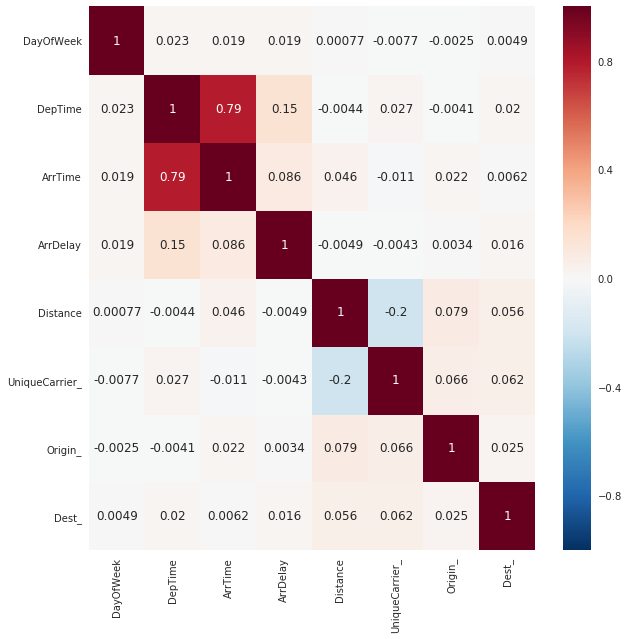

In [16]:
corrmat = df[cols_for_correlation].corr()
sns.heatmap(corrmat, annot=True)
figure = plt.gcf()
figure.set_size_inches(10, 10)
# plt.show()
plt.savefig(IMG_DIR+'/corr.png', dpi = DPI)

In [17]:
def plot(col1, col2):
    # https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html#seaborn.jointplot
    sns.jointplot(df[col1],df[col2],dropna=True, kind="hex")
    figure = plt.gcf()
    figure.set_size_inches(10, 10)
    # for notebook
    # plt.show()
    plt.savefig('%s/%s_%s.png'%(IMG_DIR, col1, col2), dpi = DPI)

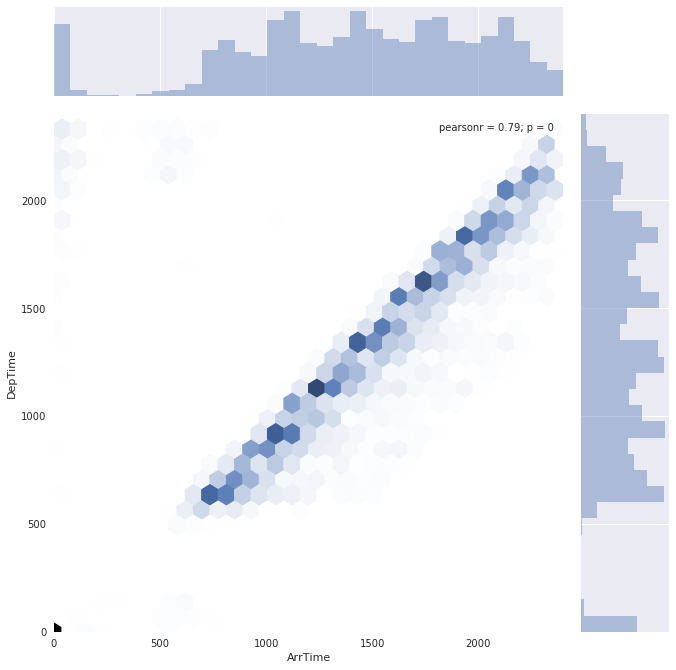

In [18]:
plot('ArrTime', 'DepTime')

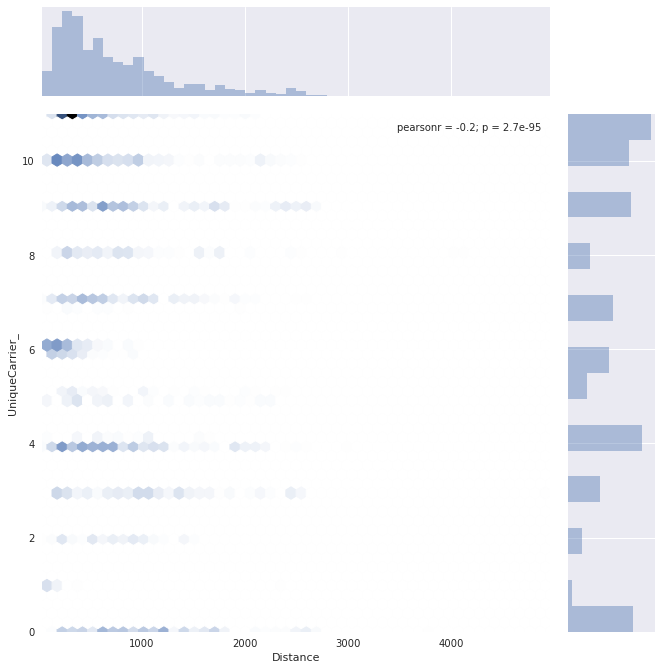

In [19]:
plot('Distance', 'UniqueCarrier_')

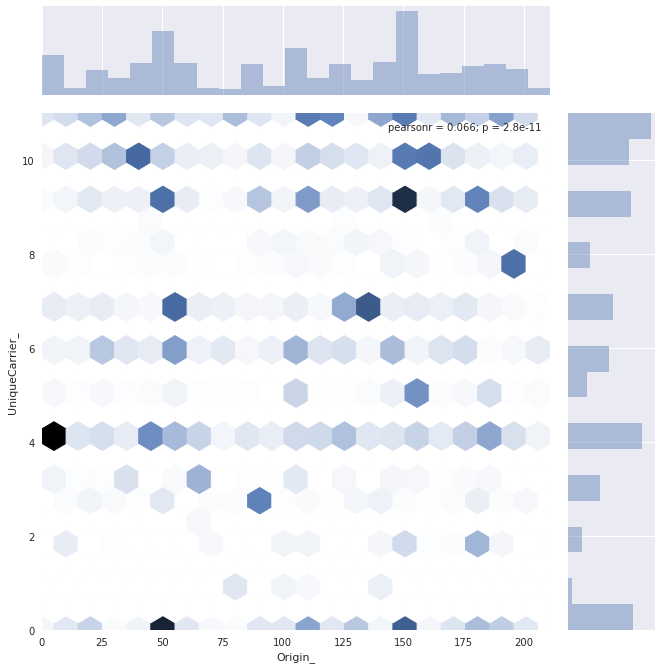

In [20]:
plot('Origin_', 'UniqueCarrier_')

## Correct some timestamps and add a composed timestamp for easy reference

In [21]:
# 2400 is not a valid time
df['CRSDepTime'] = df.apply(lambda row: 2359 if row['CRSDepTime'] == 2400 else row['CRSDepTime'],axis='columns')

In [22]:
df['@timestamp'] = df.apply(lambda row: pd.Timestamp('%s-%s-%s;%04d'%(row['Year'], row['Month'], row['DayofMonth'], row['CRSDepTime'])),axis='columns')

In [28]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier_,Origin_,Dest_,@timestamp
628400,2001,2,1,4,1420.0,1420,1518.0,1520,WN,1419,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,11,109,9,2001-02-01 14:20:00
181749,2001,1,19,5,1757.0,1750,1924.0,1918,TW,486,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,8,200,190,2001-01-19 17:50:00
283565,2001,1,26,5,1125.0,1115,1232.0,1222,DL,1137,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,4,188,21,2001-01-26 11:15:00
258232,2001,1,21,7,1945.0,1945,2231.0,2309,US,159,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,10,154,153,2001-01-21 19:45:00
459588,2001,1,26,5,611.0,615,844.0,855,AA,2753,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,0,180,187,2001-01-26 06:15:00


In [23]:
timestamps = df['@timestamp']

In [24]:
plt.hist?

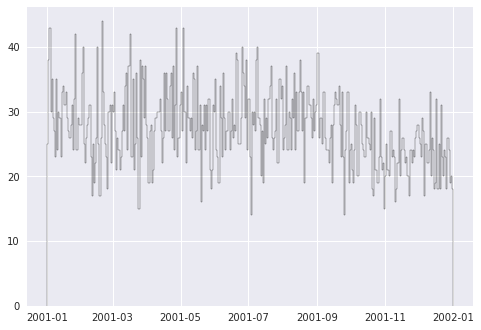

In [25]:
plt.hist(timestamps.tolist(), bins=365, histtype = 'step', color='black')
plt.show()

In [26]:
10000 / 365

27.397260273972602

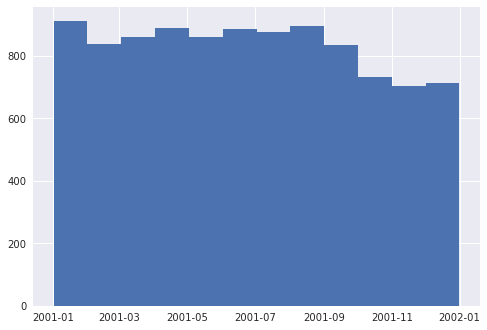

In [27]:
plt.hist(timestamps.tolist(), bins=12, histtype = 'bar')
plt.show()

## Convert fields 'cancelled' and 'diverted' to boolean

In [29]:
df['Cancelled'] = df.apply(lambda row: False if row['Cancelled'] == 0 else True, axis='columns')
df['Diverted'] = df.apply(lambda row: False if row['Diverted'] == 0 else True, axis='columns')

In [30]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier_,Origin_,Dest_,@timestamp
628400,2001,2,1,4,1420.0,1420,1518.0,1520,WN,1419,...,False,-1.0,-1.0,-1.0,-1.0,-1.0,11,109,9,2001-02-01 14:20:00
181749,2001,1,19,5,1757.0,1750,1924.0,1918,TW,486,...,False,-1.0,-1.0,-1.0,-1.0,-1.0,8,200,190,2001-01-19 17:50:00
283565,2001,1,26,5,1125.0,1115,1232.0,1222,DL,1137,...,False,-1.0,-1.0,-1.0,-1.0,-1.0,4,188,21,2001-01-26 11:15:00
258232,2001,1,21,7,1945.0,1945,2231.0,2309,US,159,...,False,-1.0,-1.0,-1.0,-1.0,-1.0,10,154,153,2001-01-21 19:45:00
459588,2001,1,26,5,611.0,615,844.0,855,AA,2753,...,False,-1.0,-1.0,-1.0,-1.0,-1.0,0,180,187,2001-01-26 06:15:00
